# Binomial Notebook

In this notebook we provide a summary of the Binomial distribution and the Poisson and Gaussian (or normal) approximinations.  

The binomial distribution defines the probability of getting $k$ successes (e.g., heads) in $n$ independent Bernoulli experiments (e.g., coin flips).  

## The Probability Mass Function (pmf) and Computing Related Probabilities 
The **probability mass function (pmf)** for a binomial random variable is:

$$p_{X(u)}(k) = \left( \begin{matrix} n \\ k \end{matrix} \right) p^k (1-p)^{n-k},~~~~~ k = 0, 1, 2, \ldots n$$

Suppose we flip a fair coin $n=10$ times, what is the probability of $k=3$ heads?  This is 

$$p_{X(u)}(3) = \left( \begin{matrix} 10 \\ 3 \end{matrix} \right) (0.5)^3 (0.5)^{10-3} = 120 2^{-10} = 30/256 = 0.117$$

We can get this using Python as follows:

In [157]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
figure_size = (9, 6)

prob_3_in_10 = stats.binom.pmf(3, 10, 0.5)  ## k, n, p
print(f'Probability of 3 heads in 10 flips: {prob_3_in_10 : 0.4f}')

Probability of 3 heads in 10 flips:  0.1172


We can also find the entire pmf and plot it.

In Python, we can compute the pmf using [scipy.stats.binom](https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.stats.binom.html#scipy.stats.binom)

The pmf: [0.00097656 0.00976563 0.04394531 0.1171875  0.20507812 0.24609375
 0.20507812 0.1171875  0.04394531 0.00976563 0.00097656]



Text(0, 0.5, '$p_{X(u)}(k)$')

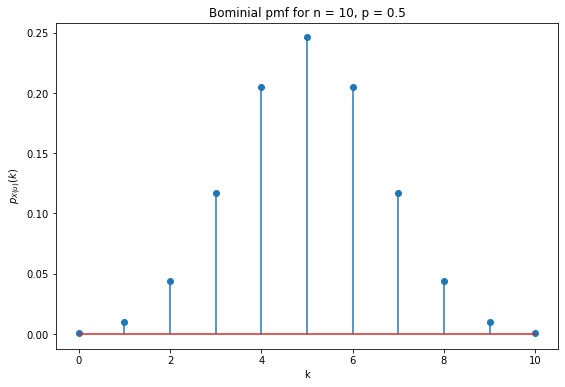

In [158]:
n = 10
p = 0.5
k_vals = np.arange(n + 1)
pmf = stats.binom.pmf(k_vals, n, p)  
print(f'The pmf: {pmf}\n')

plt.figure(figsize = figure_size)
plt.stem(k_vals, pmf)
plt.title(f'Bominial pmf for n = {n}, p = {p}')
plt.xlabel('k')
plt.ylabel(r'$p_{X(u)}(k)$')

Suppose we have a true/false quiz with 10 questions and a student guesses on all the questions?  The number of correct answers is a binomial random variable with parameters $n=10$, $p=0.5$, as considered above.  Suppose a passing grade is 70% or better, what is the probability that the student passes?
$$ P(\{ X(u) \geq 7\}) = P(\{ X(u) = 7\} \cup \{ X(u) = 8\} \cup \{ X(u) = 9\} \cup \{ X(u) = 10\})$$
These are mutually exclive events, so 
$$P(\{ X(u) \geq 7\}) =  P(\{ X(u) = 7\}) + P(\{ X(u) = 8\}) + P(\{ X(u) = 9\}) + P(\{ X(u) = 710\})$$
Using the definition of the pmf, we have 
$$P(\{ X(u) \geq 7\}) = p_{X(u)}(7) + p_{X(u)}(8) + p_{X(u)}(9) + p_{X(u)}(10)$$

In [159]:
p_geq_7 = np.sum(pmf[7:])
print(f'The probability of passing the test by guessing = {p_geq_7 : 1.3g}')

The probability of passing the test by guessing =  0.172


Notice that almost all of the probability mass of this comes from the first term -- i.e., the probability of passing and the probability of passing by getting exactly 7 correct are very close numerically.

Let's quickly reproduce the above for the case of a 10 question multiple choice exam where each question has 4 possible answers and, again, the student randomly guesses. Note that now the probability of getting an answer correct is $p=1/4$

The pmf: [5.63135147e-02 1.87711716e-01 2.81567574e-01 2.50282288e-01
 1.45998001e-01 5.83992004e-02 1.62220001e-02 3.08990479e-03
 3.86238098e-04 2.86102295e-05 9.53674316e-07]

The probability of passing the test by guessing =  0.00351


Text(0, 0.5, '$p_{X(u)}(k)$')

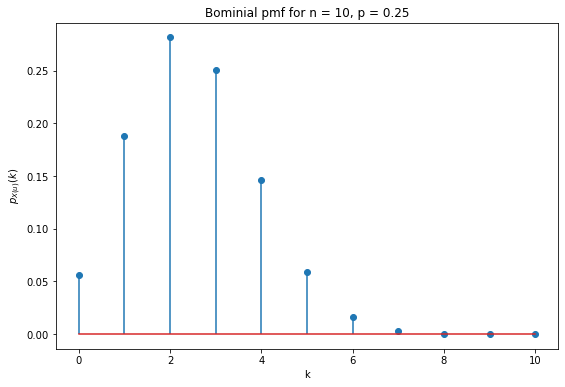

In [160]:
n = 10
p = 0.25
k_vals = np.arange(n + 1)

pmf = stats.binom.pmf(k_vals, n, p)  
print(f'The pmf: {pmf}\n')

p_geq_7 = np.sum(pmf[7:])
print(f'The probability of passing the test by guessing = {p_geq_7 : 1.3g}')

plt.figure(figsize = figure_size)
plt.stem(k_vals, pmf)
plt.title(f'Bominial pmf for n = {n}, p = {p}')
plt.xlabel('k')
plt.ylabel(r'$p_{X(u)}(k)$')

Notice that the probability of passing is much lower for a quiz where each questipon has 4 possible response than it is when there are 2 possible responses per question!

## Generating Realizations Drawn from the Binomial Distribution
In order to simulate this using Python, we use [numpy.random.binomial()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html).  For example, let's get 1000 realizations of the binomial random variale defined by the above multiple choice question:

First 10 realizations have this many correct: [2 5 3 2 3 3 3 2 3 2]
The realization with the most correct anwers from these 1000 trials had 7 correct


Text(0, 0.5, 'relative frequency of k out of n successes')

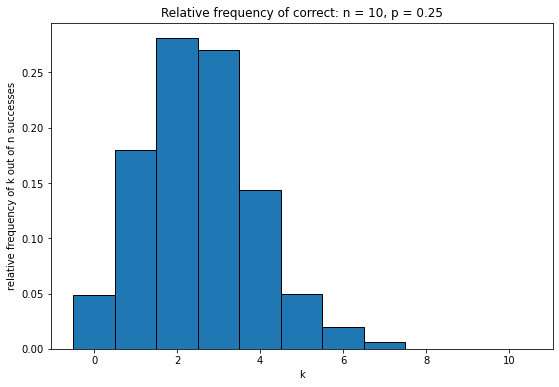

In [161]:
n = 10
p = 0.25

correct_by_guessing = np.random.binomial(n, p, 1000)

print(f'First 10 realizations have this many correct: {correct_by_guessing[:10]}')
print(f'The realization with the most correct anwers from these 1000 trials had {np.max(correct_by_guessing)} correct')

plt.figure(figsize = figure_size)
hist_data = plt.hist(correct_by_guessing, bins = np.arange(n + 2) - 0.5, edgecolor='k', density = True)
plt.title(f'Relative frequency of correct: n = {n}, p = {p}')
plt.xlabel('k')
plt.ylabel('relative frequency of k out of n successes')
## Note: in the above plot I set the bins explicity (bin edges) 
## Note: density = True normalizes the histogram so it can be viewed as a sample pmf (ie., relative frequencies)


We can also compare these relative frequencies against the probability model (pmf).  

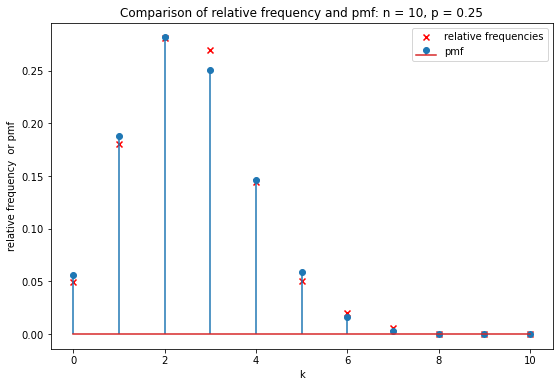

In [162]:
plt.figure(figsize = figure_size)
plt.stem(pmf, label = 'pmf')
plt.scatter(np.arange(n + 1), hist_data[0], marker = 'x', color = 'r', label = 'relative frequencies')
plt.title(f'Comparison of relative frequency and pmf: n = {n}, p = {p}')
plt.xlabel('k')
plt.ylabel('relative frequency  or pmf')
plt.legend()

## Large n Approximations

For large values of $n$, the probabilities on the binomial pmf can be diffiicult to evaluate.  We are spoiled these days with very good math packages in Python and other languages, so the vlaue of these approximation may not be as apparent to you as it was to earlier generations!  However, these approximations also lead to distributions that are important in their own right.

There are two approximations for the binomial distribution for large $n$: the Poisson approximation and the Gaussian (or normal) approximation.  

### Posisson Approximation: Large $n$, small $p$
The Poisson approximation to the binomial distribution is most accurate when $n \gg 1$ and when $\alpha = np$ is on the order of 1.  For example, if there are $n=1000$ people in the audience for a seminar and each has a probability of $p=2/1000$ of asking a question, then how many people will ask questions?  

In this case, most of the probability mass for the Binomial distrition is at small values of $k$ and it follows an exponential decay as $k$ increases.  

Text(0.5, 0, 'k')

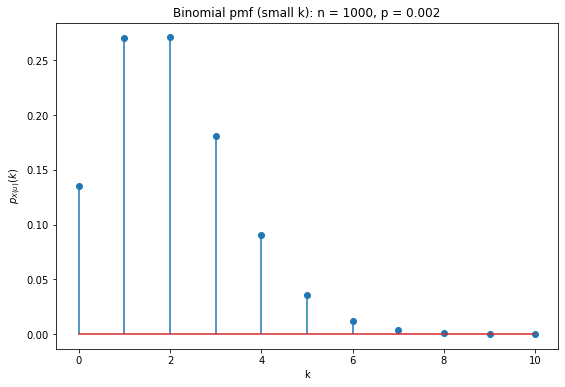

In [163]:
n = 1000
p = 2 / 1000

pmf = stats.binom.pmf(k_vals, n, p)

plt.figure(figsize = figure_size)
plt.stem(pmf, label = 'pmf')
plt.title(f'Binomial pmf (small k): n = {n}, p = {p}')
plt.ylabel(r'$p_{X(u)}(k)$')
plt.xlabel('k')

This is a binomial random variable, but it is very well approximated by a Poisson distribution with $\alpha = np$:

$p_{X(u)}(k) = \left( \begin{matrix} n \\ k \end{matrix} \right) p^k (1-p)^{n-k} \approx \frac{\alpha^k}{k!} e^{-\alpha}$
where $k \in \{0,1, \ldots n\}$.  

Let's evaluate this numerically -- notice it is very accurate!  This is typically used for small values of $k$.

k	binomial[k]	Poisson[k]	percent error
0	 0.135065	 0.135335	 0.200468 %
1	 0.270670	 0.270671	 0.000067 %
2	 0.270942	 0.270671	 0.100033 %
3	 0.180628	 0.180447	 0.100033 %
4	 0.090223	 0.090224	 0.000167 %
5	 0.036017	 0.036089	 0.200971 %
6	 0.011970	 0.012030	 0.503084 %
7	 0.003406	 0.003437	 0.907523 %
8	 0.000847	 0.000859	 1.415617 %
9	 0.000187	 0.000191	 2.029018 %


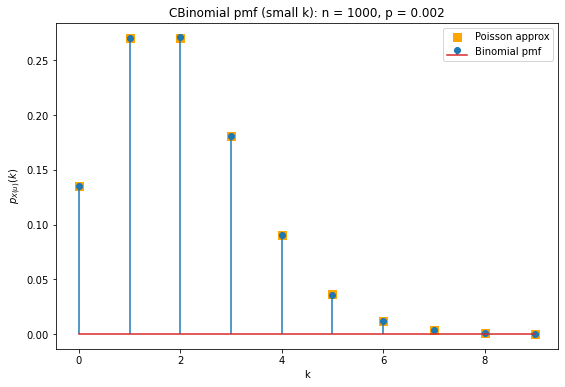

In [164]:
n = 1000
p = 2 / 1000
alpha = n * p

k_vals = np.arange(10)

pmf = stats.binom.pmf(k_vals, n, p)
pmf_poisson = stats.poisson.pmf(k_vals, alpha)
percent_error = 100 * np.abs(pmf - pmf_poisson) / pmf

print('k\tbinomial[k]\tPoisson[k]\tpercent error')
for k in k_vals:
    print(f'{k}\t{pmf[k] : 1.6f}\t{pmf_poisson[k] : 1.6f}\t{percent_error[k] : 1.6f} %')

plt.figure(figsize = figure_size)
plt.stem(pmf, label = 'Binomial pmf')
plt.scatter(k_vals, pmf_poisson, marker = 's', s = 75, color = 'orange', label = 'Poisson approx')
plt.title(f'CBinomial pmf (small k): n = {n}, p = {p}')
plt.ylabel(r'$p_{X(u)}(k)$')
plt.xlabel('k')
plt.legend()

### Guassian Approximation: large $n$, $np$ Large

When $n$ and $np$ are large, the binomial distribution has a bell shape around the center at $\approx n / 2$.  Let's first plot an example of this for $n=50$, $p=0.5$.   

Text(0.5, 0, 'k')

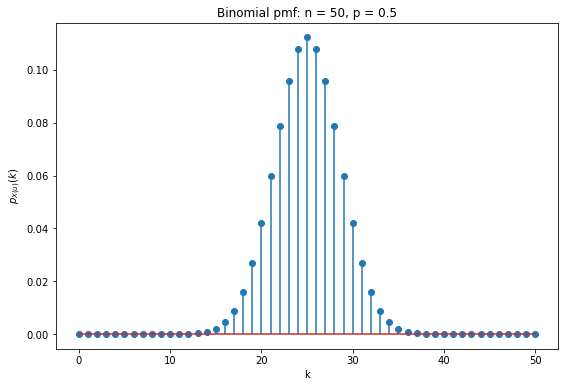

In [165]:
n = 50
p = 0.5

k_vals = np.arange(51)
pmf = stats.binom.pmf(k_vals, n, p)

plt.figure(figsize = figure_size)
plt.stem(pmf, label = 'pmf')
plt.title(f'Binomial pmf: n = {n}, p = {p}')
plt.ylabel(r'$p_{X(u)}(k)$')
plt.xlabel('k')

Now, let's add the corresponding bell-curve approximation.  The approximation is when the center of the bell is at $m=np$ and the width of the bell is $\sigma = \sqrt{np(1-p)}$.  

This approximation is called the [De Moivre–Laplace theorem](https://en.wikipedia.org/wiki/De_Moivre–Laplace_theorem), but later in the class we will learn that this approximation is a special case of the **Central Limit Theorem**.

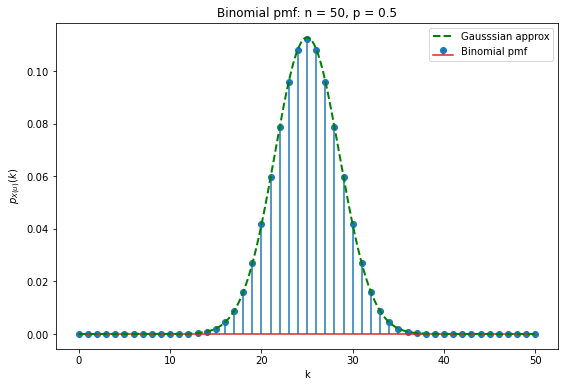

In [166]:
n = 50
p = 0.5
k_vals = np.arange(51)
pmf = stats.binom.pmf(k_vals, n, p)

x_vals = np.arange(0, n, 0.01)
norm_pdf = stats.norm.pdf(x_vals , n * p, np.sqrt(n * p * (1 - p)) )
# the m (mean) parameter is m = np and the variance or sigma^2 parameter is sigma^2 = npq

plt.figure(figsize = figure_size)
plt.stem(pmf, label = 'Binomial pmf')
plt.plot(x_vals, norm_pdf, color = 'green', linestyle = '--', linewidth = 2, label = 'Gausssian approx')
plt.title(f'Binomial pmf: n = {n}, p = {p}')
plt.ylabel(r'$p_{X(u)}(k)$')
plt.xlabel('k')
plt.legend()


Since the Gaussian bell is continuous, to approximate the Bimonial proabbilities, we need to integrate.  Integrating the Gaussian bell curve is very common in probability and statsics.  There is no closed-form for this integral, but it is included in most numerical packages including Python, R, Matlab, Excel, etc.  

There are different conventions for implmenting this integral, but the convention I use is:

$$ \mathrm{Q}(z) = \int_z^\infty \frac{1}{\sqrt{2\pi}} e^{-x^2/2} \, dx$$

The integrand is a standard bell curve -- i.e., centered at 0 (m=0) and with "width" one (sigma=1).  The Q-function is the integral of the right-tail of this standard bell curve.  Let define it in Python and plot it.  

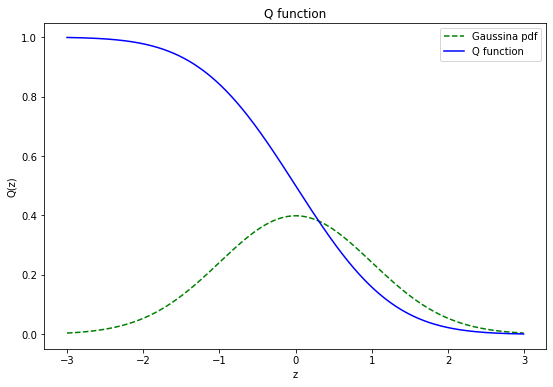

In [167]:
def Q_func(x):
    return stats.norm.sf(x)

x_vals = np.arange(-3, +3, 0.01)
norm_pdf = stats.norm.pdf(x_vals , 0, 1)

plt.figure(figsize = figure_size)
plt.plot(x_vals, norm_pdf, color = 'green', linestyle = '--', label = 'Gaussina pdf')
plt.plot(x_vals, Q_func(x_vals), color = 'blue',  label = 'Q function')
plt.title(f'Q function')
plt.ylabel('Q(z)')
plt.xlabel('z')
plt.legend()


To approximate the Binomial pdf, we integrate around the value of $k$ -- i.e., from $k - 0.5$ to $k + 0.5$ -- the Gaussian bell curve with $m=np$ and $\sigma^2 = np (1-p)$.  
$$p_{X(u)}(k) = \left( \begin{matrix} n \\ k \end{matrix} \right) p^k (1-p)^{n-k} \approx \int_{k-1/2}^{k+1/2} 
\frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left( \frac{-(x-m)^2}{2\sigma^2} \right) \, dx = \mathrm{Q}\left( \frac{k - 0.5 - np}{\sqrt{npq}}\right) - \mathrm{Q}\left( \frac{k + 0/5 - np}{\sqrt{npq}}\right)$$
where $q = 1-p$.  

This can further be approximated by approximating the bell cure as constant over the interval $k-1/2$ to $k+1/2$:

$$p_{X(u)}(k) = \left( \begin{matrix} n \\ k \end{matrix} \right) p^k (1-p)^{n-k} \approx 
\frac{1}{\sqrt{2 \pi npq}} \exp\left( \frac{-(x-np)^2}{2npq} \right)$$

Let's check this approximation for the case of $n=50$, $p=0.5$:

In [168]:
n = 50
p = 0.5
root_npq = np.sqrt(n * p * (1-p))

k_vals = np.arange(20, 31)

pmf = stats.binom.pmf(k_vals, n, p)
Q_func_approx = Q_func( (k_vals - n * p - 0.5) / root_npq) - Q_func( (k_vals - n * p + 0.5) / root_npq)
bell_approx = stats.norm.pdf(k_vals , n * p, root_npq)

print('k\t\tBinomial\t\t\tQ-approx\t\t\tbell-approx')
for i, k in enumerate(k_vals):
    print(f'{k}\t\t{pmf[i]}\t\t{Q_func_approx[i]}\t\t{bell_approx[i]}')


k		Binomial			Q-approx			bell-approx
20		0.04185914925255224		0.041648428575624785		0.04151074974205948
21		0.05979878464650314		0.059553509292706974		0.0594985786257469
22		0.07882567067039052		0.07865065801218585		0.07872434317142872
23		0.09596168603351876		0.09593655917695953		0.0961541298839308
24		0.1079568967877087		0.1080819217204213		0.10841347871048632
25		0.11227517265921709		0.11246291601828484		0.11283791670955126
26		0.1079568967877087		0.1080819217204213		0.10841347871048632
27		0.09596168603351876		0.09593655917695953		0.0961541298839308
28		0.0788256706703905		0.0786506580121859		0.07872434317142872
29		0.05979878464650314		0.05955350929270692		0.0594985786257469
30		0.041859149252552165		0.04164842857562476		0.04151074974205948


When summing the binomial from $k_1$ to $k_2$, we should combine the individual intervals and use a single Q-function expression for the integral over the entire range:

$$\sum_{k=k_1}^{k_2} \left( \begin{matrix} n \\ k \end{matrix} \right) p^k (1-p)^{n-k}
\approx \int_{k_1-1/2}^{k_2+1/2} 
\frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left( \frac{-(x-m)^2}{2\sigma^2} \right) \, dx = \mathrm{Q}\left( \frac{k_1 - 0.5 - np}{\sqrt{npq}}\right) - \mathrm{Q}\left( \frac{k_2 + 0/5 - np}{\sqrt{npq}}\right)$$

This approximation for the sum over a binomial and the corresponding sum for the Poisson approximation are implmented below

In [169]:
def Q_func(x):
    return stats.norm.sf(x)

def binomial_approximations(k1, k2, n, p):
    ## for one value pass it as k, k
    if k2 < k1:
        return 0.0
    k_vals = np.arange(k1, k2 + 1)
    true_prob = stats.binom.pmf(k_vals, n, p).sum()
    alpha = n * p
    root_npq = np.sqrt(alpha * (1-p))
    poisson_approx = stats.poisson.pmf(k_vals, alpha).sum()
    gaussian_approx = Q_func( (k1 - alpha - 0.5) / root_npq) - Q_func( (k2 - alpha + 0.5) / root_npq)
    return true_prob, poisson_approx, gaussian_approx

First, let's consider a case when the Guassian approximation should be accurate.  Suppose we flip a fair coin $n$ times and we are interested in the probability that the relative frequency of heads is between 0.45 and 0.55.  Let's compute this for $n = 10, 50, 100, 1000, 10000$ and compare the exact Binomial, Guassian approximation, and the Poisson approximation.

In [170]:
p = 0.5

print('n\t\t\tbinomial\t\tPoisson Approx\t\t\tGuassian Approx')
for n in [10, 50, 100, 1000, 10000]:
    k1 = int(0.45 * n)
    k2 = int(0.55 * n)
    approxs = binomial_approximations(k1, k2, n, p)
    print(f'{n}\t\t{approxs[0]}\t\t{approxs[1]}\t\t{approxs[2]}')

n			binomial		Poisson Approx			Guassian Approx
10		0.45117187500000017		0.3509347395357013		0.45269432740311966
50		0.5989380089720625		0.45288733202292897		0.5991505358252324
100		0.7287469759261652		0.5634301680684987		0.7286678781072347
1000		0.998608258405578		0.9761071702172864		0.9985963548204593
10000		0.9999999999999993		0.9999999999999871		1.0


Now let's compare for a case when the Poisson approximation should be good.  Specifically, let's find the probability that there are 3 or fewer successes in $n$ trials for large $n$ when $n p = 1$

In [172]:
k1 = 0
k2 = 3

print('n\t\t\tbinomial\t\tPoisson Approx\t\t\tGuassian Approx')
for n in [10, 50, 100, 1000, 10000]:
    p = 1 / n
    approxs = binomial_approximations(k1, k2, n, p)
    print(f'{n}\t\t{approxs[0]}\t\t{approxs[1]}\t\t{approxs[2]}')

n			binomial		Poisson Approx			Guassian Approx
10		0.9872048016000002		0.9810118431238463		0.9388728537080463
50		0.9822419193020286		0.9810118431238463		0.9293641262738809
100		0.9816259635553505		0.9810118431238463		0.9281736425271995
1000		0.9810731665496394		0.9810118431238463		0.9271021823713799
10000		0.9810179745500618		0.9810118431238463		0.9269950382666972
